# Using Python and Chat GPT to scrape a website - All the troubleshoot process

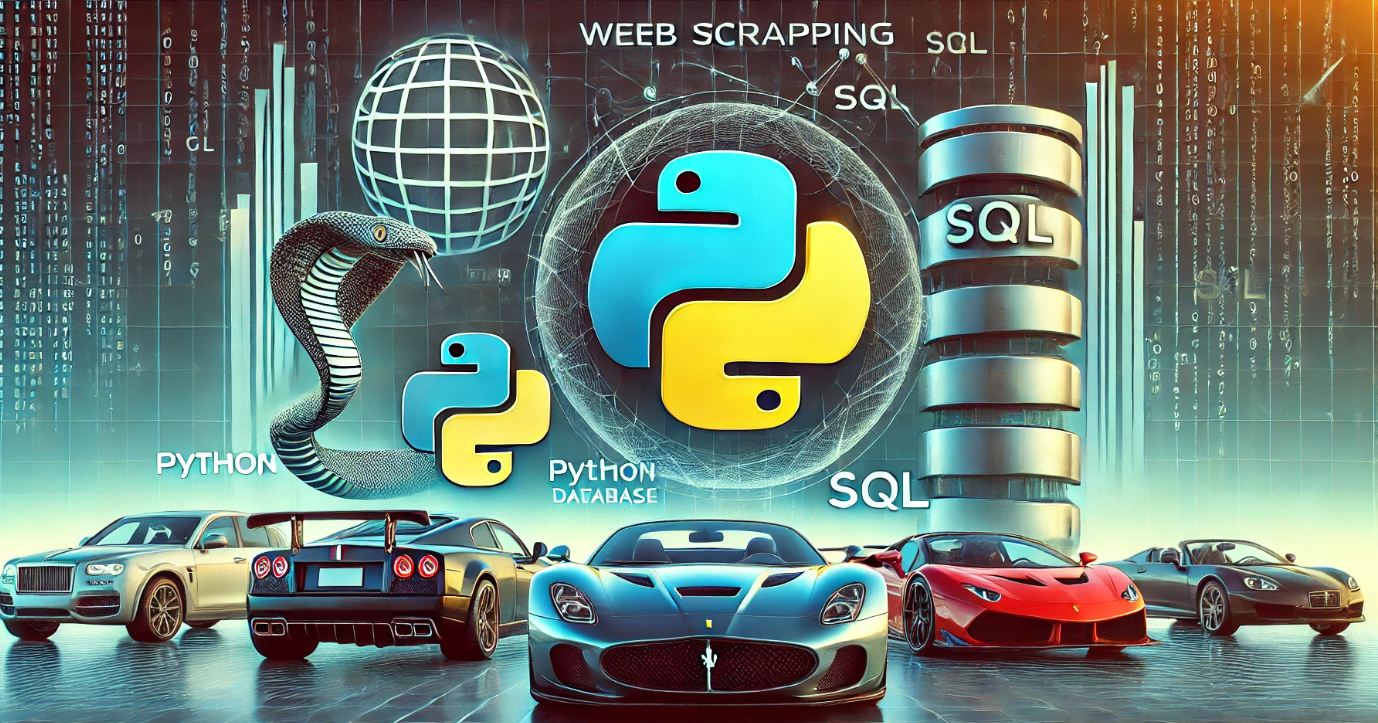

In [3]:
import os
from IPython.display import Image
PATH = "C:\\Users\\pitsi\\Desktop\\2024 Youtube\\6. Web Scraping\\"
Image("web4.png",width=900, height=900)

## Agenda:

1. Start with the question in chat GPT
2. Troubleshoot 1 - Errors
3. Troubleshoot 2 - Column/Data Structure
4. Troubleshoot 3 - Adding multible pages
5. Troubleshoot 4 - Fixing the structure of pages
6. Writing the data in SQL Server or Excel

## 1.Start with the question in chat GPT

Write some python code in jupyter notebooks that scrapes this website (https://carsheet.io/aston-martin,audi,bentley,bmw,ferrari,ford,mercedes-benz/2024/2-door/), all pages,  and stores the data in 1 excel file

In [ ]:
# !pip install requests beautifulsoup4 pandas openpyxl

## 2.Troubleshoot 1 - Errors


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the base URL and initialize an empty list to store data
base_url = "https://carsheet.io/aston-martin,audi,bentley,bmw,ferrari,ford,mercedes-benz/2024/2-door/"
data = []

# Function to extract data from a single page
def scrape_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the relevant data (this may need to be adjusted based on the website structure)
    car_list = soup.find_all('div', class_='car-item')  # Adjust selector based on actual structure

    for car in car_list:
        car_info = {
            'Name': car.find('h2', class_='car-name').text.strip(),  # Adjust selector
            'Price': car.find('span', class_='car-price').text.strip(),  # Adjust selector
            'Details': car.find('div', class_='car-details').text.strip()  # Adjust selector
        }
        data.append(car_info)

# Scrape the first page
scrape_page(base_url)

# If the site has multiple pages, you need to scrape them in a loop
# Example loop to iterate through pages (adjust the logic as needed)
# for page_number in range(2, total_pages + 1):  # Adjust range and logic
#     page_url = f"{base_url}?page={page_number}"
#     scrape_page(page_url)

# Create a DataFrame and save to Excel
df = pd.DataFrame(data)
df.to_excel('cars_data.xlsx', index=False)

## ERROR: NameError: name 'response' is not defined

## Check if it worked?

In [6]:
pd.DataFrame(data)

Empty DataFrame
Columns: []
Index: []

## Copy and paste the error to chat GPT

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the base URL and initialize an empty list to store data
base_url = "https://carsheet.io/aston-martin,audi,bentley,bmw,ferrari,ford,mercedes-benz/2024/2-door/"
data = []

# Function to extract data from a single page
def scrape_page(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the relevant data (this may need to be adjusted based on the website structure)
        car_list = soup.find_all('div', class_='car-item')  # Adjust selector based on actual structure

        for car in car_list:
            car_info = {
                'Name': car.find('h2', class_='car-name').text.strip(),  # Adjust selector
                'Price': car.find('span', class_='car-price').text.strip(),  # Adjust selector
                'Details': car.find('div', class_='car-details').text.strip()  # Adjust selector
            }
            data.append(car_info)
    except requests.RequestException as e:
        print(f"An error occurred: {e}")

# Scrape the first page
scrape_page(base_url)

# If the site has multiple pages, you need to scrape them in a loop
# Example loop to iterate through pages (adjust the logic as needed)
# for page_number in range(2, total_pages + 1):  # Adjust range and logic
#     page_url = f"{base_url}?page={page_number}"
#     scrape_page(page_url)

# Create a DataFrame and save to Excel
df = pd.DataFrame(data)
df.to_excel('cars_data.xlsx', index=False)

In [16]:
data

[]

In [18]:
# Error testing 
url = "https://carsheet.io/aston-martin,audi,bentley,bmw,ferrari,ford,mercedes-benz/2024/2-door/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
soup



<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width" name="viewport"/>
<link href="/images/favicon.png" rel="icon" type="image/png"/>
<link href="https://fonts.googleapis.com/css?family=Fira+Sans:400,500,700&amp;display=swap" rel="stylesheet"/>
<!-- Bootstrap CSS -->
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.0/css/bootstrap.min.css" integrity="sha384-9aIt2nRpC12Uk9gS9baDl411NQApFmC26EwAOH8WgZl5MYYxFfc+NcPb1dKGj7Sk" rel="stylesheet"/>
<link href="https://cdnjs.cloudflare.com/ajax/libs/bootstrap-select/1.13.17/css/bootstrap-select.min.css" rel="stylesheet"/>
<!-- <link href="https://blackrockdigital.github.io/startbootstrap-sb-admin-2/css/sb-admin-2.min.css" rel="stylesheet"> -->
<!-- <link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/w/bs4/dt-1.10.18/b-1.5.6/b-colvis-1.5.6/cr-1.5.0/fc-3.2.5/fh-3.1.4/kt-2.5.0/r-2.2.2/rg-1.1.0/sc-2.0.0/datatables.min.c

In [14]:
car_list = soup.find_all('div', class_='car-item')
car_list

[]

## 3. Troubleshoot 2 - Column/Data Structure

##### Look to find the table structure you are trying to pull

In [27]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width" name="viewport"/>
<link href="/images/favicon.png" rel="icon" type="image/png"/>
<link href="https://fonts.googleapis.com/css?family=Fira+Sans:400,500,700&amp;display=swap" rel="stylesheet"/>
<!-- Bootstrap CSS -->
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.0/css/bootstrap.min.css" integrity="sha384-9aIt2nRpC12Uk9gS9baDl411NQApFmC26EwAOH8WgZl5MYYxFfc+NcPb1dKGj7Sk" rel="stylesheet"/>
<link href="https://cdnjs.cloudflare.com/ajax/libs/bootstrap-select/1.13.17/css/bootstrap-select.min.css" rel="stylesheet"/>
<!-- <link href="https://blackrockdigital.github.io/startbootstrap-sb-admin-2/css/sb-admin-2.min.css" rel="stylesheet"> -->
<!-- <link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/w/bs4/dt-1.10.18/b-1.5.6/b-colvis-1.5.6/cr-1.5.0/fc-3.2.5/fh-3.1.4/kt-2.5.0/r-2.2.2/rg-1.1.0/sc-2.0.0/datatables.min.c

In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the base URL and initialize an empty list to store data
base_url = "https://carsheet.io/aston-martin,audi,bentley,bmw,ferrari,ford,mercedes-benz/2024/2-door/"
data = []

# Function to extract data from a single page
def scrape_page(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the table
        table = soup.find('table', {'id': 'carsheet'})
        if not table:
            print("Table not found on the page.")
            return
        
        # Extract table headers
        headers = [th.text.strip() for th in table.find_all('th')]
        
        # Extract table rows
        rows = table.find_all('tr')[1:]  # Skip the header row
        
        for row in rows:
            cols = row.find_all('td')
            if len(cols) == len(headers):  # Ensure row length matches header length
                car_info = {headers[i]: cols[i].text.strip() for i in range(len(headers))}
                data.append(car_info)
                
    except requests.RequestException as e:
        print(f"An error occurred: {e}")

# Scrape the first page
scrape_page(base_url)

# If the site has multiple pages, you need to scrape them in a loop
# Example loop to iterate through pages (adjust the logic as needed)
# for page_number in range(2, total_pages + 1):  # Adjust range and logic
#     page_url = f"{base_url}?page={page_number}"
#     scrape_page(page_url)

# Create a DataFrame and save to Excel
df = pd.DataFrame(data)
df.to_excel('cars_data.xlsx', index=False)

### Check if it worked

In [22]:
pd.DataFrame(data).head()

Make Model  Year                           Trim     MSRP Invoice Price  \
0  Audi    A5  2024  Premium Plus S line w/45 TFSI  $52,500       $49,351   
1  Audi    A5  2024  Premium Plus S line w/45 TFSI  $59,700       $56,119   
2  Audi    A5  2024       Premium S line w/45 TFSI  $48,400       $45,496   
3  Audi    A5  2024       Premium S line w/45 TFSI  $55,600       $52,264   
4  Audi    A5  2024      Prestige S line w/45 TFSI  $56,650       $53,251   

  Used/New Price Body Size   Body Style Cylinders Engine Aspiration  \
0        $52,500   Midsize        Coupe        I4      Turbocharged   
1        $59,700   Midsize  Convertible        I4      Turbocharged   
2        $48,400   Midsize        Coupe        I4      Turbocharged   
3        $55,600   Midsize  Convertible        I4      Turbocharged   
4        $56,650   Midsize        Coupe        I4      Turbocharged   

  Drivetrain Transmission         Horsepower                  Torque  \
0        AWD    automatic  261 hp @ 6300 rpm  273 ft-lbs. @ 4200 rpm   
1        AWD    automatic  261 hp @ 6300 rpm  273 ft-lbs. @ 4200 rpm   
2        AWD    automatic  261 hp @ 6300 rpm  273 ft-lbs. @ 4200 rpm   
3        AWD    automatic  261 hp @ 6300 rpm  273 ft-lbs. @ 4200 rpm   
4        AWD    automatic  261 hp @ 6300 rpm  273 ft-lbs. @ 4200 rpm   

  Highway Fuel Economy  
0               32 mpg  
1               33 mpg  
2               32 mpg  
3               33 mpg  
4               32 mpg

### It worked, but I always try to break down the code to make sure it works correctly

In [26]:
url = "https://carsheet.io/aston-martin,audi,bentley,bmw,ferrari,ford,mercedes-benz/2024/2-door/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
# Find the table

table = soup.find('table', {'id': 'carsheet'})
table

<table class="table table-striped" id="carsheet" style="width:100%">
<thead>
<tr>
<th>
<div class="th-wrap">Make</div>
</th>
<th>
<div class="th-wrap">Model</div>
</th>
<th>
<div class="th-wrap">Year</div>
</th>
<th>
<div class="th-wrap">Trim</div>
</th>
<th>
<div class="th-wrap">MSRP</div>
</th>
<th>
<div class="th-wrap">Invoice Price</div>
</th>
<th>
<div class="th-wrap">Used/New Price</div>
</th>
<th>
<div class="th-wrap">Body Size</div>
</th>
<th>
<div class="th-wrap">Body Style</div>
</th>
<th>
<div class="th-wrap">Cylinders</div>
</th>
<th>
<div class="th-wrap">Engine Aspiration</div>
</th>
<th>
<div class="th-wrap">Drivetrain</div>
</th>
<th>
<div class="th-wrap">Transmission</div>
</th>
<th>
<div class="th-wrap">Horsepower</div>
</th>
<th>
<div class="th-wrap">Torque</div>
</th>
<th>
<div class="th-wrap">Highway Fuel Economy</div>
</th>
</tr>
</thead>
<tbody>
<tr><td>Audi</td><td>A5</td><td>2024</td><td data-sort="Premium Plus S line">Premium Plus S line w/45 TFSI</td><td data-

In [65]:
table = soup.find('table', {'id': 'carsheet'})
if not table:
    print("Table not found on the page.")
    return

SyntaxError: 'return' outside function (3929963033.py, line 4)

In [28]:
# Extract table headers
headers = [th.text.strip() for th in table.find_all('th')]
headers

['Make',
 'Model',
 'Year',
 'Trim',
 'MSRP',
 'Invoice Price',
 'Used/New Price',
 'Body Size',
 'Body Style',
 'Cylinders',
 'Engine Aspiration',
 'Drivetrain',
 'Transmission',
 'Horsepower',
 'Torque',
 'Highway Fuel Economy']

In [32]:
# Extract table rows
rows = table.find_all('tr')[1:]  # Skip the header row
for row in rows:
    cols = row.find_all('td')
    if len(cols) == len(headers):  # Ensure row length matches header length
        car_info = {headers[i]: cols[i].text.strip() for i in range(len(headers))}
        data.append(car_info)

data

[{'Make': 'Audi',
  'Model': 'A5',
  'Year': '2024',
  'Trim': 'Premium Plus S line w/45 TFSI',
  'MSRP': '$52,500',
  'Invoice Price': '$49,351',
  'Used/New Price': '$52,500',
  'Body Size': 'Midsize',
  'Body Style': 'Coupe',
  'Cylinders': 'I4',
  'Engine Aspiration': 'Turbocharged',
  'Drivetrain': 'AWD',
  'Transmission': 'automatic',
  'Horsepower': '261 hp @ 6300 rpm',
  'Torque': '273 ft-lbs. @ 4200 rpm',
  'Highway Fuel Economy': '32 mpg'},
 {'Make': 'Audi',
  'Model': 'A5',
  'Year': '2024',
  'Trim': 'Premium Plus S line w/45 TFSI',
  'MSRP': '$59,700',
  'Invoice Price': '$56,119',
  'Used/New Price': '$59,700',
  'Body Size': 'Midsize',
  'Body Style': 'Convertible',
  'Cylinders': 'I4',
  'Engine Aspiration': 'Turbocharged',
  'Drivetrain': 'AWD',
  'Transmission': 'automatic',
  'Horsepower': '261 hp @ 6300 rpm',
  'Torque': '273 ft-lbs. @ 4200 rpm',
  'Highway Fuel Economy': '33 mpg'},
 {'Make': 'Audi',
  'Model': 'A5',
  'Year': '2024',
  'Trim': 'Premium S line w/45 

##### Provide more structure to Chat GPT

In [54]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the base URL and initialize an empty list to store data
base_url = "https://carsheet.io/aston-martin,audi,bentley,bmw,ferrari,ford,mercedes-benz/2024/2-door/"
data = []

# Function to extract data from a single page
def scrape_page(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the table
        table = soup.find('table', {'id': 'carsheet'})
        if not table:
            print("Table not found on the page.")
            return
        
        # Extract table headers
        headers = [th.text.strip() for th in table.find_all('th')]
        
        # Extract table rows
        rows = table.find('tbody').find_all('tr')  # Get rows from <tbody>
        
        for row in rows:
            cols = row.find_all('td')
            if len(cols) == len(headers):  # Ensure row length matches header length
                car_info = {headers[i]: cols[i].text.strip() for i in range(len(headers))}
                data.append(car_info)
                
    except requests.RequestException as e:
        print(f"An error occurred: {e}")

# Scrape the first page
scrape_page(base_url)

# If the site has multiple pages, you need to scrape them in a loop
# Example loop to iterate through pages (adjust the logic as needed)
# for page_number in range(2, total_pages + 1):  # Adjust range and logic
#     page_url = f"{base_url}?page={page_number}"
#     scrape_page(page_url)

# Create a DataFrame and save to Excel
df = pd.DataFrame(data)
df.to_excel('cars_data.xlsx', index=False)

### Check if it worked

In [56]:
pd.DataFrame(data).head()

Make Model  Year                           Trim     MSRP Invoice Price  \
0  Audi    A5  2024  Premium Plus S line w/45 TFSI  $52,500       $49,351   
1  Audi    A5  2024  Premium Plus S line w/45 TFSI  $59,700       $56,119   
2  Audi    A5  2024       Premium S line w/45 TFSI  $48,400       $45,496   
3  Audi    A5  2024       Premium S line w/45 TFSI  $55,600       $52,264   
4  Audi    A5  2024      Prestige S line w/45 TFSI  $56,650       $53,251   

  Used/New Price Body Size   Body Style Cylinders Engine Aspiration  \
0        $52,500   Midsize        Coupe        I4      Turbocharged   
1        $59,700   Midsize  Convertible        I4      Turbocharged   
2        $48,400   Midsize        Coupe        I4      Turbocharged   
3        $55,600   Midsize  Convertible        I4      Turbocharged   
4        $56,650   Midsize        Coupe        I4      Turbocharged   

  Drivetrain Transmission         Horsepower                  Torque  \
0        AWD    automatic  261 hp @ 6300 rpm  273 ft-lbs. @ 4200 rpm   
1        AWD    automatic  261 hp @ 6300 rpm  273 ft-lbs. @ 4200 rpm   
2        AWD    automatic  261 hp @ 6300 rpm  273 ft-lbs. @ 4200 rpm   
3        AWD    automatic  261 hp @ 6300 rpm  273 ft-lbs. @ 4200 rpm   
4        AWD    automatic  261 hp @ 6300 rpm  273 ft-lbs. @ 4200 rpm   

  Highway Fuel Economy  
0               32 mpg  
1               33 mpg  
2               32 mpg  
3               33 mpg  
4               32 mpg

In [40]:
url = "https://carsheet.io/aston-martin,audi,bentley,bmw,ferrari,ford,mercedes-benz/2024/2-door/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
# Find the table

table = soup.find('table', {'id': 'carsheet'})
table

<table class="table table-striped" id="carsheet" style="width:100%">
<thead>
<tr>
<th>
<div class="th-wrap">Make</div>
</th>
<th>
<div class="th-wrap">Model</div>
</th>
<th>
<div class="th-wrap">Year</div>
</th>
<th>
<div class="th-wrap">Trim</div>
</th>
<th>
<div class="th-wrap">MSRP</div>
</th>
<th>
<div class="th-wrap">Invoice Price</div>
</th>
<th>
<div class="th-wrap">Used/New Price</div>
</th>
<th>
<div class="th-wrap">Body Size</div>
</th>
<th>
<div class="th-wrap">Body Style</div>
</th>
<th>
<div class="th-wrap">Cylinders</div>
</th>
<th>
<div class="th-wrap">Engine Aspiration</div>
</th>
<th>
<div class="th-wrap">Drivetrain</div>
</th>
<th>
<div class="th-wrap">Transmission</div>
</th>
<th>
<div class="th-wrap">Horsepower</div>
</th>
<th>
<div class="th-wrap">Torque</div>
</th>
<th>
<div class="th-wrap">Highway Fuel Economy</div>
</th>
</tr>
</thead>
<tbody>
<tr><td>Audi</td><td>A5</td><td>2024</td><td data-sort="Premium Plus S line">Premium Plus S line w/45 TFSI</td><td data-

In [42]:
table = soup.find('table', {'id': 'carsheet'})
if not table:
    print("Table not found on the page.")
    return

SyntaxError: 'return' outside function (3929963033.py, line 4)

In [44]:
# Extract table headers
headers = [th.text.strip() for th in table.find_all('th')]
headers

['Make',
 'Model',
 'Year',
 'Trim',
 'MSRP',
 'Invoice Price',
 'Used/New Price',
 'Body Size',
 'Body Style',
 'Cylinders',
 'Engine Aspiration',
 'Drivetrain',
 'Transmission',
 'Horsepower',
 'Torque',
 'Highway Fuel Economy']

In [46]:
# Extract table rows
rows = table.find_all('tr')[1:]  # Skip the header row
for row in rows:
    cols = row.find_all('td')
    if len(cols) == len(headers):  # Ensure row length matches header length
        car_info = {headers[i]: cols[i].text.strip() for i in range(len(headers))}
        data.append(car_info)

data

[{'Make': 'Audi',
  'Model': 'A5',
  'Year': '2024',
  'Trim': 'Premium Plus S line w/45 TFSI',
  'MSRP': '$52,500',
  'Invoice Price': '$49,351',
  'Used/New Price': '$52,500',
  'Body Size': 'Midsize',
  'Body Style': 'Coupe',
  'Cylinders': 'I4',
  'Engine Aspiration': 'Turbocharged',
  'Drivetrain': 'AWD',
  'Transmission': 'automatic',
  'Horsepower': '261 hp @ 6300 rpm',
  'Torque': '273 ft-lbs. @ 4200 rpm',
  'Highway Fuel Economy': '32 mpg'},
 {'Make': 'Audi',
  'Model': 'A5',
  'Year': '2024',
  'Trim': 'Premium Plus S line w/45 TFSI',
  'MSRP': '$59,700',
  'Invoice Price': '$56,119',
  'Used/New Price': '$59,700',
  'Body Size': 'Midsize',
  'Body Style': 'Convertible',
  'Cylinders': 'I4',
  'Engine Aspiration': 'Turbocharged',
  'Drivetrain': 'AWD',
  'Transmission': 'automatic',
  'Horsepower': '261 hp @ 6300 rpm',
  'Torque': '273 ft-lbs. @ 4200 rpm',
  'Highway Fuel Economy': '33 mpg'},
 {'Make': 'Audi',
  'Model': 'A5',
  'Year': '2024',
  'Trim': 'Premium S line w/45 

## 4. Troubleshoot 3 - Adding multible pages

In [64]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the base URL and initialize an empty list to store data
base_url = "https://carsheet.io/aston-martin,audi,bentley,bmw,ferrari,ford,mercedes-benz/2024/2-door/"
data = []

# Function to extract data from a single page
def scrape_page(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract table headers
        headers = [th.text.strip() for th in soup.find_all('table', {'id': 'carsheet'})[0].find_all('th')]
        
        # Extract table rows
        rows = soup.find('table', {'id': 'carsheet'}).find('tbody').find_all('tr')  # Get rows from <tbody>
        
        for row in rows:
            cols = row.find_all('td')
            if len(cols) == len(headers):  # Ensure row length matches header length
                car_info = {headers[i]: cols[i].text.strip() for i in range(len(headers))}
                data.append(car_info)
                
    except requests.RequestException as e:
        print(f"An error occurred: {e}")

# Scrape all pages
for page_number in range(1, 4):  # Pages 1, 2, and 3
    page_url = f"{base_url}?page={page_number}"
    scrape_page(page_url)

# Create a DataFrame and save to Excel
df = pd.DataFrame(data)
df.to_excel('cars_data.xlsx', index=False)

### Check if it worked

In [66]:
pd.DataFrame(data).head()

Make Model  Year                           Trim     MSRP Invoice Price  \
0  Audi    A5  2024  Premium Plus S line w/45 TFSI  $52,500       $49,351   
1  Audi    A5  2024  Premium Plus S line w/45 TFSI  $59,700       $56,119   
2  Audi    A5  2024       Premium S line w/45 TFSI  $48,400       $45,496   
3  Audi    A5  2024       Premium S line w/45 TFSI  $55,600       $52,264   
4  Audi    A5  2024      Prestige S line w/45 TFSI  $56,650       $53,251   

  Used/New Price Body Size   Body Style Cylinders Engine Aspiration  \
0        $52,500   Midsize        Coupe        I4      Turbocharged   
1        $59,700   Midsize  Convertible        I4      Turbocharged   
2        $48,400   Midsize        Coupe        I4      Turbocharged   
3        $55,600   Midsize  Convertible        I4      Turbocharged   
4        $56,650   Midsize        Coupe        I4      Turbocharged   

  Drivetrain Transmission         Horsepower                  Torque  \
0        AWD    automatic  261 hp @ 6300 rpm  273 ft-lbs. @ 4200 rpm   
1        AWD    automatic  261 hp @ 6300 rpm  273 ft-lbs. @ 4200 rpm   
2        AWD    automatic  261 hp @ 6300 rpm  273 ft-lbs. @ 4200 rpm   
3        AWD    automatic  261 hp @ 6300 rpm  273 ft-lbs. @ 4200 rpm   
4        AWD    automatic  261 hp @ 6300 rpm  273 ft-lbs. @ 4200 rpm   

  Highway Fuel Economy  
0               32 mpg  
1               33 mpg  
2               32 mpg  
3               33 mpg  
4               32 mpg

In [ ]:
# check if the pages work correctly

In [68]:
df.count()

Make                    297
Model                   297
Year                    297
Trim                    297
MSRP                    297
Invoice Price           297
Used/New Price          297
Body Size               297
Body Style              297
Cylinders               297
Engine Aspiration       297
Drivetrain              297
Transmission            297
Horsepower              297
Torque                  297
Highway Fuel Economy    297
dtype: int64

In [70]:
df.drop_duplicates().count()

Make                    96
Model                   96
Year                    96
Trim                    96
MSRP                    96
Invoice Price           96
Used/New Price          96
Body Size               96
Body Style              96
Cylinders               96
Engine Aspiration       96
Drivetrain              96
Transmission            96
Horsepower              96
Torque                  96
Highway Fuel Economy    96
dtype: int64

## 5. Troubleshoot 4 - Fixing the structure of pages - Revoming the 2 door from the url and adding the years

In [72]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the base URL and initialize an empty list to store data
base_url = "https://carsheet.io/aston-martin,audi,bentley,bmw,ferrari,ford,mercedes-benz,nissan/2023,2024/"
data = []

# Function to extract data from a single page
def scrape_page(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract table headers
        headers = [th.text.strip() for th in soup.find_all('table', {'id': 'carsheet'})[0].find_all('th')]
        
        # Extract table rows
        rows = soup.find('table', {'id': 'carsheet'}).find('tbody').find_all('tr')  # Get rows from <tbody>
        
        for row in rows:
            cols = row.find_all('td')
            if len(cols) == len(headers):  # Ensure row length matches header length
                car_info = {headers[i]: cols[i].text.strip() for i in range(len(headers))}
                data.append(car_info)
                
    except requests.RequestException as e:
        print(f"An error occurred: {e}")

# Scrape multiple pages
for start in range(0, 150, 50):  # Change the range based on how many pages (e.g., 0, 50, 100, etc.)
    page_url = f"{base_url}{start}-{start+50}/"
    scrape_page(page_url)

# Create a DataFrame and save to Excel
df = pd.DataFrame(data)
df.to_excel('cars_data.xlsx', index=False)

In [74]:
df.count()

Make                    600
Model                   600
Year                    600
Trim                    600
MSRP                    600
Invoice Price           600
Used/New Price          600
Body Size               600
Body Style              600
Cylinders               600
Engine Aspiration       600
Drivetrain              600
Transmission            600
Horsepower              600
Torque                  600
Highway Fuel Economy    600
dtype: int64

In [76]:
df.drop_duplicates().count()

Make                    200
Model                   200
Year                    200
Trim                    200
MSRP                    200
Invoice Price           200
Used/New Price          200
Body Size               200
Body Style              200
Cylinders               200
Engine Aspiration       200
Drivetrain              200
Transmission            200
Horsepower              200
Torque                  200
Highway Fuel Economy    200
dtype: int64

## Provide more context to Chat GPT

"the change of pages should be first the starting link, then 50-100, then 100-250, then 150-200, etc"

In [78]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the base URL and initialize an empty list to store data
base_url = "https://carsheet.io/aston-martin,audi,bentley,bmw,ferrari,ford,mercedes-benz,nissan/2023,2024/"
data = []

# Function to extract data from a single page
def scrape_page(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract table headers
        headers = [th.text.strip() for th in soup.find_all('table', {'id': 'carsheet'})[0].find_all('th')]
        
        # Extract table rows
        rows = soup.find('table', {'id': 'carsheet'}).find('tbody').find_all('tr')  # Get rows from <tbody>
        
        for row in rows:
            cols = row.find_all('td')
            if len(cols) == len(headers):  # Ensure row length matches header length
                car_info = {headers[i]: cols[i].text.strip() for i in range(len(headers))}
                data.append(car_info)
                
    except requests.RequestException as e:
        print(f"An error occurred: {e}")

# Scrape multiple pages based on the custom page range format
page_ranges = [
    "0-50", "50-100", "100-250", "150-200"  # Adjust these ranges based on the website's structure
]

for page_range in page_ranges:
    page_url = f"{base_url}{page_range}/"
    scrape_page(page_url)

# Create a DataFrame and save to Excel
df = pd.DataFrame(data)
df.to_excel('cars_data.xlsx', index=False)

## Enabling all pages

"i want to range to go all the way to 2000"

In [81]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the base URL and initialize an empty list to store data
base_url = "https://carsheet.io/aston-martin,audi,bentley,bmw,ferrari,ford,mercedes-benz,nissan/2023,2024/"
data = []

# Function to extract data from a single page
def scrape_page(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract table headers
        headers = [th.text.strip() for th in soup.find_all('table', {'id': 'carsheet'})[0].find_all('th')]
        
        # Extract table rows
        rows = soup.find('table', {'id': 'carsheet'}).find('tbody').find_all('tr')  # Get rows from <tbody>
        
        for row in rows:
            cols = row.find_all('td')
            if len(cols) == len(headers):  # Ensure row length matches header length
                car_info = {headers[i]: cols[i].text.strip() for i in range(len(headers))}
                data.append(car_info)
                
    except requests.RequestException as e:
        print(f"An error occurred: {e}")

# Generate page ranges dynamically
page_ranges = [f"{i}-{i+50}" for i in range(0, 2000, 50)]

# Scrape all pages
for page_range in page_ranges:
    page_url = f"{base_url}{page_range}/"
    scrape_page(page_url)

# Create a DataFrame and save to Excel
df = pd.DataFrame(data)
df.to_excel('cars_data.xlsx', index=False)

In [85]:
df.drop_duplicates().count()

Make                    1610
Model                   1610
Year                    1610
Trim                    1610
MSRP                    1610
Invoice Price           1610
Used/New Price          1610
Body Size               1610
Body Style              1610
Cylinders               1610
Engine Aspiration       1610
Drivetrain              1610
Transmission            1610
Horsepower              1610
Torque                  1610
Highway Fuel Economy    1610
dtype: int64

In [87]:
# There is still dupllication but it managed to pull all the data so we will just drop the duplication

df[df['Model'] == 'Titan XD']

Make     Model  Year              Trim     MSRP Invoice Price  \
2517  Nissan  Titan XD  2024            PRO-4X  $58,160                 
2518  Nissan  Titan XD  2024  Platinum Reserve  $66,110                 
2519  Nissan  Titan XD  2024                SV  $52,200                 
2717  Nissan  Titan XD  2024            PRO-4X  $58,160                 
2718  Nissan  Titan XD  2024  Platinum Reserve  $66,110                 
2719  Nissan  Titan XD  2024                SV  $52,200                 
2917  Nissan  Titan XD  2024            PRO-4X  $58,160                 
2918  Nissan  Titan XD  2024  Platinum Reserve  $66,110                 
2919  Nissan  Titan XD  2024                SV  $52,200                 
3117  Nissan  Titan XD  2024            PRO-4X  $58,160                 
3118  Nissan  Titan XD  2024  Platinum Reserve  $66,110                 
3119  Nissan  Titan XD  2024                SV  $52,200                 
6401  Nissan  Titan XD  2023            PRO-4X  $57,770                 
6402  Nissan  Titan XD  2023  Platinum Reserve  $65,720                 
6403  Nissan  Titan XD  2023                 S  $47,990                 
6404  Nissan  Titan XD  2023                SV  $51,810                 
6416  Nissan  Titan XD  2023            PRO-4X  $57,770                 
6417  Nissan  Titan XD  2023  Platinum Reserve  $65,720                 
6418  Nissan  Titan XD  2023                 S  $47,990                 
6419  Nissan  Titan XD  2023                SV  $51,810                 
6431  Nissan  Titan XD  2023            PRO-4X  $57,770                 
6432  Nissan  Titan XD  2023  Platinum Reserve  $65,720                 
6433  Nissan  Titan XD  2023                 S  $47,990                 
6434  Nissan  Titan XD  2023                SV  $51,810                 
6446  Nissan  Titan XD  2023            PRO-4X  $57,770                 
6447  Nissan  Titan XD  2023  Platinum Reserve  $65,720                 
6448  Nissan  Titan XD  2023                 S  $47,990                 
6449  Nissan  Titan XD  2023                SV  $51,810                 

     Used/New Price Body Size    Body Style Cylinders    Engine Aspiration  \
2517        $58,160     Large  Pickup Truck        V8  Naturally Aspirated   
2518        $66,110     Large  Pickup Truck        V8  Naturally Aspirated   
2519        $52,200     Large  Pickup Truck        V8  Naturally Aspirated   
2717        $58,160     Large  Pickup Truck        V8  Naturally Aspirated   
2718        $66,110     Large  Pickup Truck        V8  Naturally Aspirated   
2719        $52,200     Large  Pickup Truck        V8  Naturally Aspirated   
2917        $58,160     Large  Pickup Truck        V8  Naturally Aspirated   
2918        $66,110     Large  Pickup Truck        V8  Naturally Aspirated   
2919        $52,200     Large  Pickup Truck        V8  Naturally Aspirated   
3117        $58,160     Large  Pickup Truck        V8  Naturally Aspirated   
3118        $66,110     Large  Pickup Truck        V8  Naturally Aspirated   
3119        $52,200     Large  Pickup Truck        V8  Naturally Aspirated   
6401        $57,770     Large  Pickup Truck        V8  Naturally Aspirated   
6402        $65,720     Large  Pickup Truck        V8  Naturally Aspirated   
6403        $47,990     Large  Pickup Truck        V8  Naturally Aspirated   
6404        $51,810     Large  Pickup Truck        V8  Naturally Aspirated   
6416        $57,770     Large  Pickup Truck        V8  Naturally Aspirated   
6417        $65,720     Large  Pickup Truck        V8  Naturally Aspirated   
6418        $47,990     Large  Pickup Truck        V8  Naturally Aspirated   
6419        $51,810     Large  Pickup Truck        V8  Naturally Aspirated   
6431        $57,770     Large  Pickup Truck        V8  Naturally Aspirated   
6432        $65,720     Large  Pickup Truck        V8  Naturally Aspirated   
6433        $47,990     Large  Pickup Truck        V8  Naturally Aspirated   
6434        $51,81

## FINAL CODE - dropping duplication

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the base URL and initialize an empty list to store data
base_url = "https://carsheet.io/aston-martin,audi,bentley,bmw,ferrari,ford,mercedes-benz,nissan/2023,2024/"

data = []

# Function to extract data from a single page
def scrape_page(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract table headers
        headers = [th.text.strip() for th in soup.find_all('table', {'id': 'carsheet'})[0].find_all('th')]
        
        # Extract table rows
        rows = soup.find('table', {'id': 'carsheet'}).find('tbody').find_all('tr')  # Get rows from <tbody>
        
        for row in rows:
            cols = row.find_all('td')
            if len(cols) == len(headers):  # Ensure row length matches header length
                car_info = {headers[i]: cols[i].text.strip() for i in range(len(headers))}
                data.append(car_info)
                
    except requests.RequestException as e:
        print(f"An error occurred: {e}")

# Generate page ranges dynamically
page_ranges = [f"{i}-{i+50}" for i in range(0, 2000, 50)]

# Scrape all pages
for page_range in page_ranges:
    page_url = f"{base_url}{page_range}/"
    scrape_page(page_url)
    

# Create a DataFrame and save to Excel
df = pd.DataFrame(data)
df = df.drop_duplicates()
df.to_excel('super_cars_data.xlsx', index=False)

In [91]:
df[df['Make'] == 'Mercedes-Benz'].head()

Make   Model  Year Trim      MSRP Invoice Price Used/New Price  \
1727  Mercedes-Benz  AMG GT  2024   43   $98,950                      $98,950   
1728  Mercedes-Benz  AMG GT  2024   53  $109,450                     $109,450   
1729  Mercedes-Benz  AMG GT  2024   55  $134,900                     $134,900   
1730  Mercedes-Benz  AMG GT  2024   63  $153,350                     $153,350   
1731  Mercedes-Benz  AMG GT  2024   63  $175,900                     $175,900   

     Body Size Body Style Cylinders Engine Aspiration Drivetrain Transmission  \
1727     Large      Sedan        I6      Turbocharged        AWD    automatic   
1728     Large      Sedan        I6       Twincharged        AWD    automatic   
1729   Midsize      Coupe        V8        Twin-Turbo        AWD    automatic   
1730     Large      Sedan        V8        Twin-Turbo        AWD    automatic   
1731   Midsize      Coupe        V8        Twin-Turbo        AWD    automatic   

             Horsepower                  Torque Highway Fuel Economy  
1727  362 hp @ 5500 rpm  369 ft-lbs. @ 1800 rpm               24 mpg  
1728  429 hp @ 6100 rpm  384 ft-lbs. @ 1800 rpm               24 mpg  
1729  469 hp @ 5500 rpm  516 ft-lbs. @ 2250 rpm               20 mpg  
1730  577 hp @ 5500 rpm  590 ft-lbs. @ 2350 rpm               21 mpg  
1731  577 hp @ 5500 rpm  590 ft-lbs. @ 2350 rpm               20 mpg

In [93]:
df['Make'].unique()

array(['Aston Martin', 'Audi', 'BMW', 'Bentley', 'Ford', 'Mercedes-Benz',
       'Nissan'], dtype=object)

## Exporting the data to SQL Server

In [25]:
# pip install pypyodbc

In [29]:
# Exporting this data back to a New Table in SQL
from sqlalchemy import create_engine
import urllib


quoted = urllib.parse.quote_plus("Driver={ODBC Driver 17 for SQL Server};"
                     "Server=DESKTOP-8L98FK0;"
                     "Database=Car_information;"
                     "Trusted_Connection=yes;")

engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))

df.to_sql('car_info_web', schema='dbo', con = engine, if_exists = 'replace')

11